# SIECI NEURONOWE – ćwiczenie 7
Ćwiczenie 7 dotyczyć będzie sieci rekurencyjnych. Sieci rekurencyjne przydatne być mogą dla danych sekwencyjnych, gdzie porządek danych w czasie jest ważny. Warstwa rekurencyjna przyjmuje na wyjściu sekwencję wektorów i zwraca również sekwencję wektorów (przy czym często interesuje nas działanie na ostatnim wektorze tej sekwencji i np. torch domyślnie zwraca zarówno pełną sekwencję wyjść, jak i ostatni stan warstwy). Odnośnie działania, istotne jest że:
- Warstwa stosuje takie samo przekształcenie dla każdego kroku w sekwencji
- w kroku n, wejściem jest krok n wejściowej sekwencji, oraz wyjście z kroku n-1
- konkretne typy warstw rekurencyjnych (RNN/GRU/LSTM) różnią się dodatkowym przekształceniem nakładanym na wyjście z poprzedniego kroku

Oprócz samych warstw rekurencyjnych, dwie istotne nowości:
- warstwa Embedding, której celem jest skonwertowanie wartości ze skończonego zbioru na wektory. Dla problemów językowych, zbiorem może być np. zbiór wszystkich słów języka. Warstwa taka to po prostu macierz (liczba słów) na (wymiarwektora), z której tak samo jak z każdej innej macierzy w obrębie struktury sieci neuronowej jesteśmy w stanie wyliczyć gradient. A to znaczy, że możemy jąoptymalizować, co kończy się znajdowaniem dla każdego słowa wektora, który w jakiś sposób oddaje „znaczenie” (a w zasadzie: powiązania między podobnymi znaczeniami, zakodowane w podobieństwie/odległości wektorów).
- Padowanie sekwencji do jednakowej długości. Teksty w zbiorze IMDB są różnej długości, więc jeżeli chcemy uczyć w trybie batchowania, należy dopełnić wektory do równej długości zerami.

Należy skorzystać ze zbioru recenzji IMDB, dostępnego w torchtext oraz kerasie:
https://keras.io/api/datasets/imdb/

Do przebadania tym razem jest:
- Typ wybranej warstwy rekurencyjnej (RNN vs. LSTM)
- Wymiar warstwy rekurencyjnej
- Wpływ przycinania sekwencji do niepełnej długości (należy wyznaczyć długość maksymalną przy padowaniu batchy, i porównać wynik uzyskany w ten sposób z wynikami uzyskanymi przycinając wszystkie teksty do ustalonej z góry wartości, np. 10, 20 słów)

Dla poprawienia wydajności, można pracować na podzbiorze mniejszych rozmiarów niż pełny train.

Ćwiczenie oceniane jest w skali 0-10 pkt, na jego wykonanie jest czas do końca semestru.

Ładowanie danych IMDB
Zbiór treningowy: 25000 recenzji
Zbiór testowy: 25000 recenzji

Podzbiór treningowy: 5000 recenzji
Podzbiór testowy: 1000 recenzji
Przykładowa sekwencja: [1, 225, 6, 678, 1474, 200, 7018, 35, 204, 1596]...
Długość przykładowej recenzji: 201
Rozkład etykiet (0=neg, 1=pos): [2437 2563]

ANALIZA DANYCH

Statystyki długości recenzji:
  Min: 11 słów
  Max: 2494 słów
  Średnia: 237.5 słów
  Mediana: 177.0 słów
  Odchylenie standardowe: 175.8


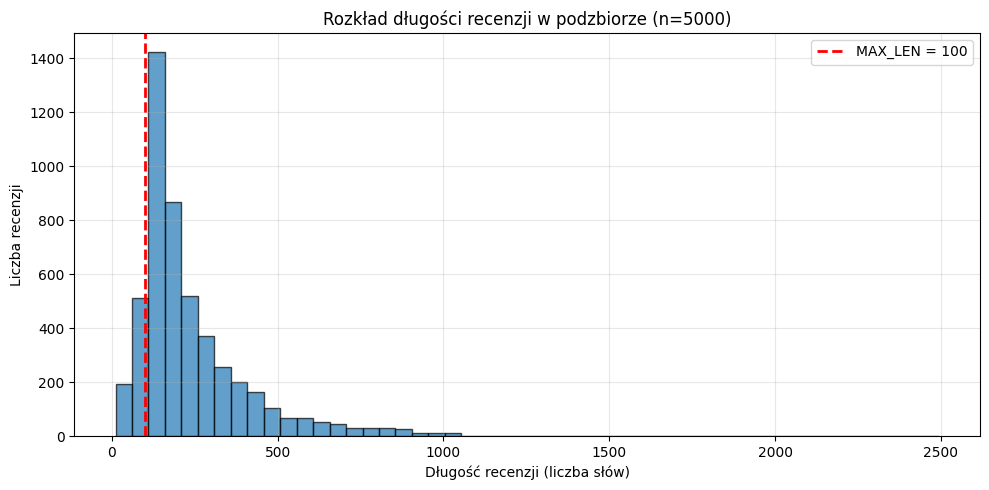


Przy MAX_LEN=100:
  4438/5000 recenzji będzie przyciętych (88.8%)
  Średnia utrata: 57.9% informacji

EKSPERYMENT 1: Porównanie typów warstw rekurencyjnych

Dane przygotowane do długości 100 słów
Kształt danych treningowych: (5000, 100)
Kształt danych testowych: (1000, 100)

Rozpoczynanie trenowania modeli...

Trenowanie Simple RNN...
  ✓ Ukończono w 12.3s, dokładność: 0.5340

Trenowanie LSTM...
  ✓ Ukończono w 49.8s, dokładność: 0.7770


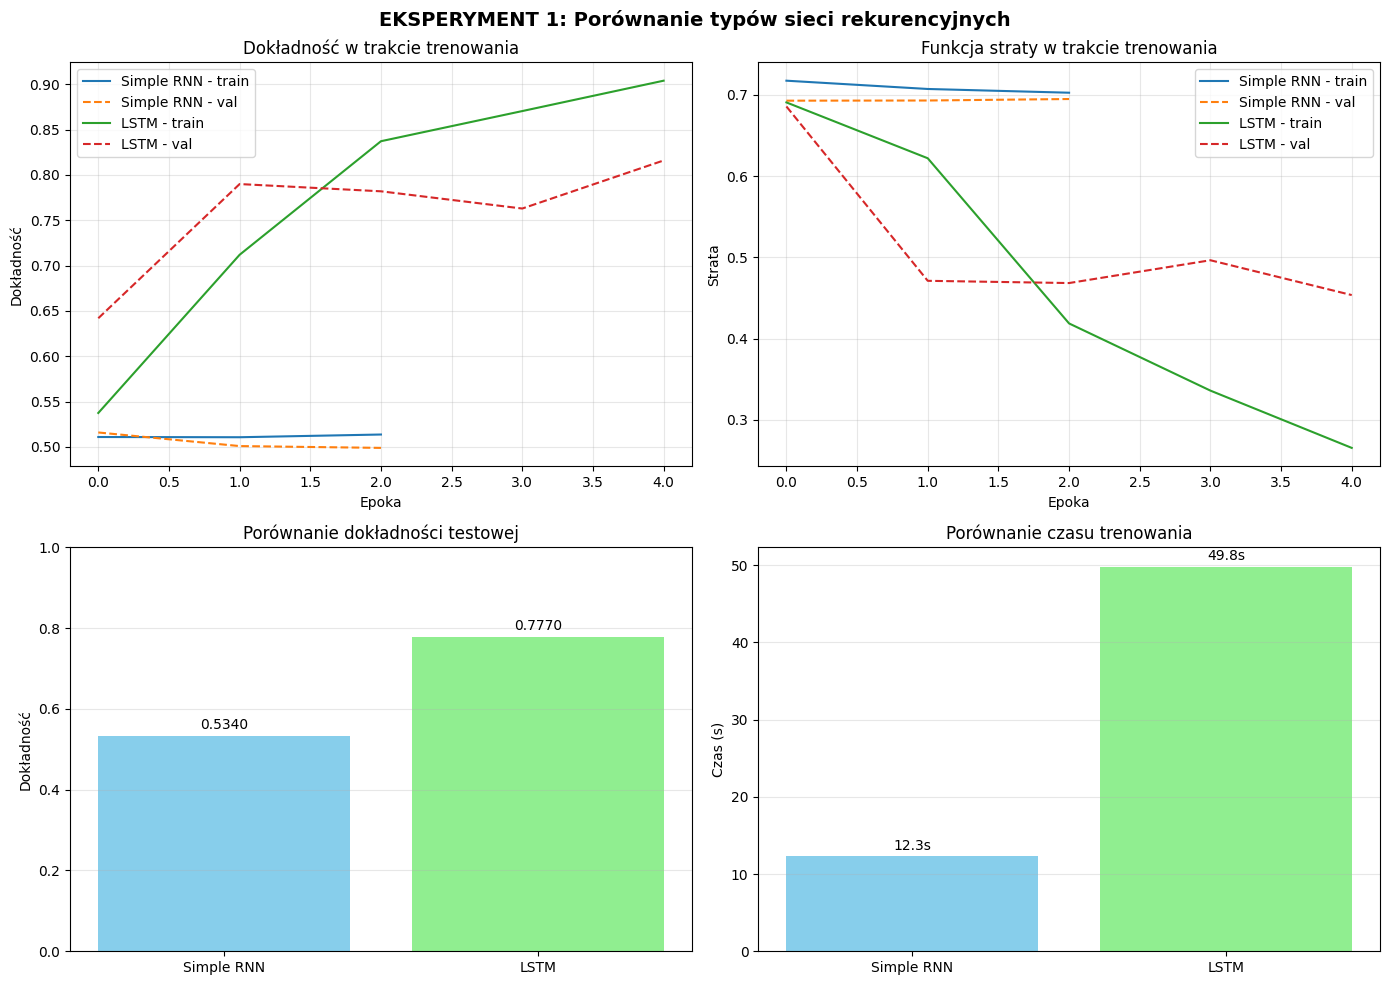


PODSUMOWANIE EKSPERYMENTU 1

Simple RNN:
  Accuracy: 0.5340
  Precision: 0.5202
  Recall: 0.7535
  Time: 12.3s
  Epoch: 3

LSTM:
  Accuracy: 0.7770
  Precision: 0.7547
  Recall: 0.8141
  Time: 49.8s
  Epoch: 5

EKSPERYMENT 2: Wpływ liczby jednostek w warstwie LSTM

Trenowanie modeli LSTM z różną liczbą jednostek...

LSTM z 32 jednostkami...
  ✓ Ukończono w 39.7s, dokładność: 0.7960

LSTM z 64 jednostkami...
  ✓ Ukończono w 49.2s, dokładność: 0.7610

LSTM z 128 jednostkami...
  ✓ Ukończono w 93.6s, dokładność: 0.7580


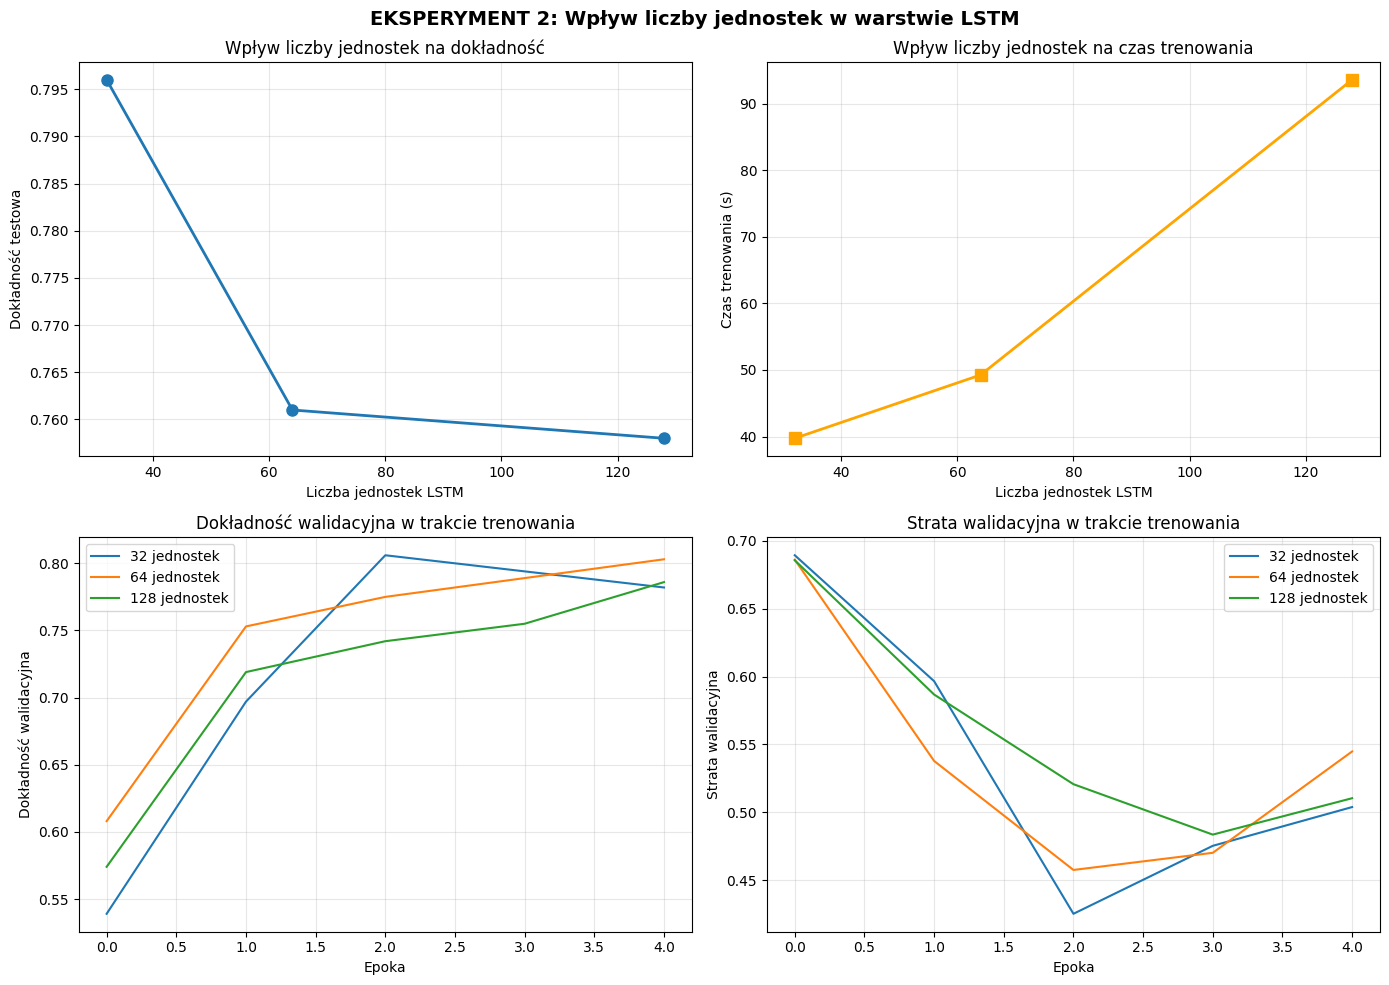


PODSUMOWANIE EKSPERYMENTU 2

LSTM (32 jednostek):
  Accuracy: 0.7960
  Precision: 0.7847
  Recall: 0.8101
  Time: 39.7s
  Epoch: 5

LSTM (64 jednostek):
  Accuracy: 0.7610
  Precision: 0.6988
  Recall: 0.9091
  Time: 49.2s
  Epoch: 5

LSTM (128 jednostek):
  Accuracy: 0.7580
  Precision: 0.7630
  Recall: 0.7414
  Time: 93.6s
  Epoch: 5

EKSPERYMENT 3: Wpływ długości sekwencji

Trenowanie modeli z różnymi długościami sekwencji...

Długość sekwencji: 10 słów...
  ✓ Ukończono w 10.8s, dokładność: 0.6520, utrata: 95.8%

Długość sekwencji: 50 słów...
  ✓ Ukończono w 25.5s, dokładność: 0.7510, utrata: 79.0%

Długość sekwencji: 100 słów...
  ✓ Ukończono w 49.6s, dokładność: 0.7810, utrata: 59.4%

Długość sekwencji: 200 słów...
  ✓ Ukończono w 76.2s, dokładność: 0.5950, utrata: 32.3%


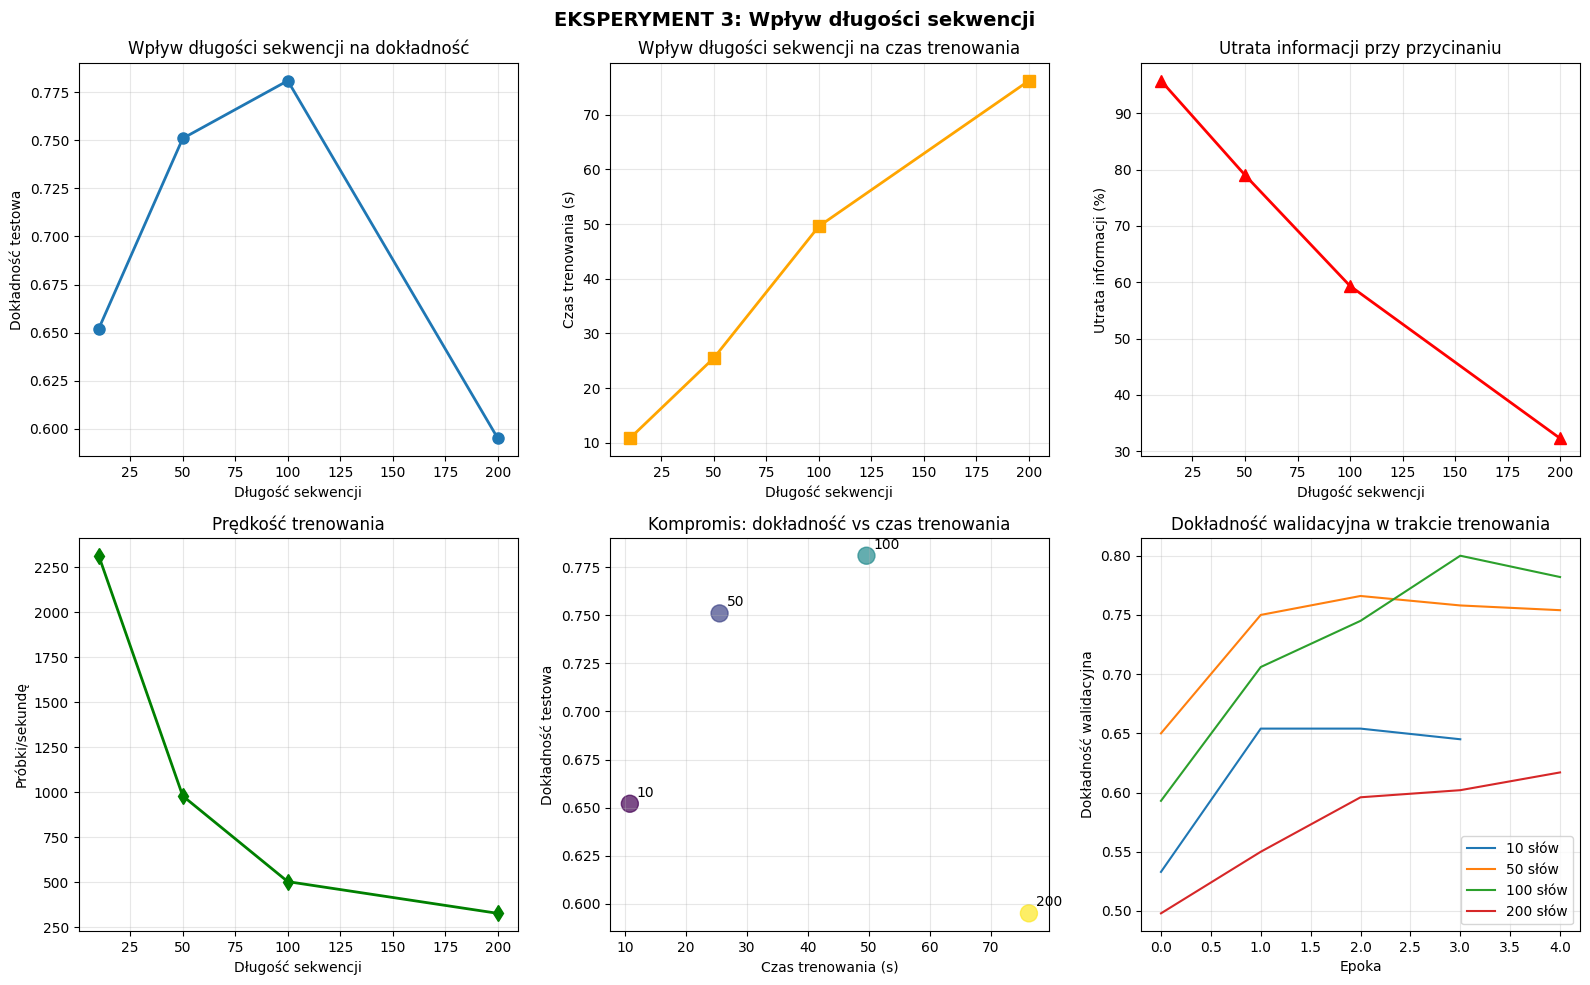


PODSUMOWANIE EKSPERYMENTU 3

Sekwencja 10 słów:
  Accuracy: 0.6520
  Precision: 0.6239
  Recall: 0.7475
  Time: 10.8s
  Epoch: 4

Sekwencja 50 słów:
  Accuracy: 0.7510
  Precision: 0.7113
  Recall: 0.8364
  Time: 25.5s
  Epoch: 5

Sekwencja 100 słów:
  Accuracy: 0.7810
  Precision: 0.7760
  Recall: 0.7838
  Time: 49.6s
  Epoch: 5

Sekwencja 200 słów:
  Accuracy: 0.5950
  Precision: 0.5592
  Recall: 0.8586
  Time: 76.2s
  Epoch: 5


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import time

# CONFIG
VOCAB_SIZE = 10000
MAX_LEN = 100
EMBEDDING_DIM = 64
BATCH_SIZE = 128
EPOCHS = 5

TRAIN_SUBSET_SIZE = 5000
TEST_SUBSET_SIZE = 1000

np.random.seed(42)
tf.random.set_seed(42)

# DATASET PRINTS FOR EARLY ANALYSIS

print("Ładowanie danych IMDB")
(X_train_full, y_train_full), (X_test_full, y_test_full) = imdb.load_data(num_words=VOCAB_SIZE)

print(f"Zbiór treningowy: {len(X_train_full)} recenzji")
print(f"Zbiór testowy: {len(X_test_full)} recenzji")

train_indices = np.random.choice(len(X_train_full), TRAIN_SUBSET_SIZE, replace=False)
test_indices = np.random.choice(len(X_test_full), TEST_SUBSET_SIZE, replace=False)

X_train = X_train_full[train_indices]
y_train = y_train_full[train_indices]
X_test = X_test_full[test_indices]
y_test = y_test_full[test_indices]

print(f"\nPodzbiór treningowy: {len(X_train)} recenzji")
print(f"Podzbiór testowy: {len(X_test)} recenzji")
print(f"Długość przykładowej recenzji: {len(X_train[0])}")
print(f"Rozkład etykiet (0=neg, 1=pos): {np.bincount(y_train)}")

# HELPER FUNCTIONS

def prepare_data(X_train, X_test, max_len):
    X_train_pad = pad_sequences(X_train, maxlen=max_len, padding='post', truncating='pre')
    X_test_pad = pad_sequences(X_test, maxlen=max_len, padding='post', truncating='pre')
    return X_train_pad, X_test_pad

def build_rnn_model(rnn_type='lstm', rnn_units=64, max_len=MAX_LEN):
    model = Sequential()

    model.add(Embedding(input_dim=VOCAB_SIZE + 1, output_dim=EMBEDDING_DIM, input_length=max_len))

    if rnn_type == 'lstm':
        model.add(LSTM(units=rnn_units, dropout=0.2, recurrent_dropout=0.2))
    else:
        model.add(SimpleRNN(units=rnn_units, dropout=0.2, recurrent_dropout=0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
    )

    return model

def train_and_evaluate(model, X_train, y_train, X_test, y_test, epochs=EPOCHS, batch_size=BATCH_SIZE):
    early_stopping = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True, verbose=0)

    start_time = time.time()
    history = model.fit(
        X_train, y_train,
        epochs=epochs,
        batch_size=batch_size,
        validation_split=0.2,
        callbacks=[early_stopping],
        verbose=0
    )
    training_time = time.time() - start_time

    test_results = model.evaluate(X_test, y_test, verbose=0)

    return history, test_results, training_time

def print_experiment_results(results, title):
    print(f"\n{'='*60}")
    print(f"{title}")
    print(f"{'='*60}")

    for i, result in enumerate(results):
        print(f"\n{result['label']}:")
        print(f"  Accuracy: {result['test_accuracy']:.4f}")
        print(f"  Precision: {result.get('test_precision', 0):.4f}")
        print(f"  Recall: {result.get('test_recall', 0):.4f}")
        print(f"  Time: {result['training_time']:.1f}s")
        print(f"  Epoch: {len(result['history'].history['loss'])}")

# DATASET INSIGHTS

print("\n" + "="*60)
print("ANALIZA DANYCH")
print("="*60)

seq_lengths = [len(seq) for seq in X_train]
print(f"\nStatystyki długości recenzji:")
print(f"  Min: {min(seq_lengths)} słów")
print(f"  Max: {max(seq_lengths)} słów")
print(f"  Średnia: {np.mean(seq_lengths):.1f} słów")
print(f"  Mediana: {np.median(seq_lengths)} słów")
print(f"  Odchylenie standardowe: {np.std(seq_lengths):.1f}")

plt.figure(figsize=(10, 5))
plt.hist(seq_lengths, bins=50, edgecolor='black', alpha=0.7)
plt.axvline(MAX_LEN, color='red', linestyle='--', linewidth=2, label=f'MAX_LEN = {MAX_LEN}')
plt.xlabel('Długość recenzji (liczba słów)')
plt.ylabel('Liczba recenzji')
plt.title(f'Rozkład długości recenzji w podzbiorze (n={TRAIN_SUBSET_SIZE})')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

num_truncated = sum(1 for seq in X_train if len(seq) > MAX_LEN)
percent_truncated = (num_truncated / len(X_train)) * 100
print(f"\nPrzy MAX_LEN={MAX_LEN}:")
print(f"  {num_truncated}/{len(X_train)} recenzji będzie przyciętych ({percent_truncated:.1f}%)")
print(f"  Średnia utrata: {(np.mean(seq_lengths) - MAX_LEN)/np.mean(seq_lengths)*100:.1f}% informacji")

# ======= EKSPERYMENT 1: PORÓWNANIE TYPÓW SIECI REKURENCYJNYCH =======

print("\n" + "="*60)
print("EKSPERYMENT 1: Porównanie typów warstw rekurencyjnych")
print("="*60)

X_train_pad, X_test_pad = prepare_data(X_train, X_test, MAX_LEN)
print(f"\nDane przygotowane do długości {MAX_LEN} słów")
print(f"Kształt danych treningowych: {X_train_pad.shape}")
print(f"Kształt danych testowych: {X_test_pad.shape}")

rnn_configs = [
    {'type': 'simple', 'label': 'Simple RNN', 'units': 64},
    {'type': 'lstm', 'label': 'LSTM', 'units': 64}
]

results_exp1 = []
histories_exp1 = []

print("\nRozpoczynanie trenowania modeli...")

for config in rnn_configs:
    print(f"\nTrenowanie {config['label']}...")

    model = build_rnn_model(
        rnn_type=config['type'],
        rnn_units=config['units'],
        max_len=MAX_LEN
    )

    history, test_results, training_time = train_and_evaluate(
        model, X_train_pad, y_train, X_test_pad, y_test
    )

    result = {
        'label': config['label'],
        'test_accuracy': test_results[1],
        'test_precision': test_results[2],
        'test_recall': test_results[3],
        'training_time': training_time,
        'history': history
    }

    results_exp1.append(result)
    histories_exp1.append(history)
    print(f"  ✓ Ukończono w {training_time:.1f}s, acc: {test_results[1]:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Wykres 1: Dokladnosc treningowa i walidacyjna
for i, history in enumerate(histories_exp1):
    axes[0, 0].plot(history.history['accuracy'], label=f"{rnn_configs[i]['label']} - train")
    axes[0, 0].plot(history.history['val_accuracy'], '--', label=f"{rnn_configs[i]['label']} - val")
axes[0, 0].set_title('Dokładność w trakcie trenowania')
axes[0, 0].set_xlabel('Epoka')
axes[0, 0].set_ylabel('Dokładność')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Wykres 2: Funkcja straty
for i, history in enumerate(histories_exp1):
    axes[0, 1].plot(history.history['loss'], label=f"{rnn_configs[i]['label']} - train")
    axes[0, 1].plot(history.history['val_loss'], '--', label=f"{rnn_configs[i]['label']} - val")
axes[0, 1].set_title('Funkcja straty w trakcie trenowania')
axes[0, 1].set_xlabel('Epoka')
axes[0, 1].set_ylabel('Strata')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Wykres 3: Porownanie dokladnosci testowej
labels = [r['label'] for r in results_exp1]
accuracies = [r['test_accuracy'] for r in results_exp1]
bars = axes[1, 0].bar(labels, accuracies, color=['skyblue', 'lightgreen'])
axes[1, 0].set_title('Porównanie dokładności testowej')
axes[1, 0].set_ylabel('Dokładność')
axes[1, 0].set_ylim([0, 1])
for bar, acc in zip(bars, accuracies):
    axes[1, 0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01,
                   f'{acc:.4f}', ha='center', va='bottom')
axes[1, 0].grid(True, alpha=0.3, axis='y')

# Wykres 4: Porownanie czasu trenowania
times = [r['training_time'] for r in results_exp1]
bars = axes[1, 1].bar(labels, times, color=['skyblue', 'lightgreen'])
axes[1, 1].set_title('Porównanie czasu trenowania')
axes[1, 1].set_ylabel('Czas (s)')
for bar, t in zip(bars, times):
    axes[1, 1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                   f'{t:.1f}s', ha='center', va='bottom')
axes[1, 1].grid(True, alpha=0.3, axis='y')

plt.suptitle('EKSPERYMENT 1: Porównanie typów sieci rekurencyjnych', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print_experiment_results(results_exp1, "PODSUMOWANIE EKSPERYMENTU 1")

# ======= EKSPERYMENT 2: WPŁYW LICZBY JEDNOSTEK W WARSTWIE LSTM =======
print("\n" + "="*60)
print("EKSPERYMENT 2: Wpływ liczby jednostek w warstwie LSTM")
print("="*60)

lstm_units_list = [32, 64, 128]
results_exp2 = []
histories_exp2 = []

print("\nTrenowanie modeli LSTM z różną liczbą jednostek...")

for units in lstm_units_list:
    print(f"\nLSTM z {units} jednostkami...")

    model = build_rnn_model(rnn_type='lstm', rnn_units=units, max_len=MAX_LEN)

    history, test_results, training_time = train_and_evaluate(
        model, X_train_pad, y_train, X_test_pad, y_test
    )

    result = {
        'label': f'LSTM ({units} jednostek)',
        'units': units,
        'test_accuracy': test_results[1],
        'test_precision': test_results[2],
        'test_recall': test_results[3],
        'training_time': training_time,
        'history': history
    }

    results_exp2.append(result)
    histories_exp2.append(history)
    print(f"  Ukończono w {training_time:.1f}s, acc: {test_results[1]:.4f}")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Wykres 1: Dokładność vs liczba jednostek
units = [r['units'] for r in results_exp2]
accuracies = [r['test_accuracy'] for r in results_exp2]
axes[0, 0].plot(units, accuracies, 'o-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Liczba jednostek LSTM')
axes[0, 0].set_ylabel('Dokładność testowa')
axes[0, 0].set_title('Wpływ liczby jednostek na dokładność')
axes[0, 0].grid(True, alpha=0.3)

# Wykres 2: Czas trenowania vs liczba jednostek
times = [r['training_time'] for r in results_exp2]
axes[0, 1].plot(units, times, 's-', linewidth=2, markersize=8, color='orange')
axes[0, 1].set_xlabel('Liczba jednostek LSTM')
axes[0, 1].set_ylabel('Czas trenowania (s)')
axes[0, 1].set_title('Wpływ liczby jednostek na czas trenowania')
axes[0, 1].grid(True, alpha=0.3)

# Wykres 3: Dokładność w trakcie trenowania dla różnych konfiguracji
for i, history in enumerate(histories_exp2):
    axes[1, 0].plot(history.history['val_accuracy'], label=f"{lstm_units_list[i]} jednostek")
axes[1, 0].set_title('Dokładność walidacyjna w trakcie trenowania')
axes[1, 0].set_xlabel('Epoka')
axes[1, 0].set_ylabel('Dokładność walidacyjna')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Wykres 4: Strata w trakcie trenowania dla różnych konfiguracji
for i, history in enumerate(histories_exp2):
    axes[1, 1].plot(history.history['val_loss'], label=f"{lstm_units_list[i]} jednostek")
axes[1, 1].set_title('Strata walidacyjna w trakcie trenowania')
axes[1, 1].set_xlabel('Epoka')
axes[1, 1].set_ylabel('Strata walidacyjna')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.suptitle('EKSPERYMENT 2: Wpływ liczby jednostek w warstwie LSTM', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print_experiment_results(results_exp2, "PODSUMOWANIE EKSPERYMENTU 2")

# EKSPERYMENT 3: WPŁYW DŁUGOŚCI SEKWENCJI
print("\n" + "="*60)
print("EKSPERYMENT 3: Wpływ długości sekwencji")
print("="*60)

# Różne długości sekwencji do przetestowania (mniej wartości dla szybkości)
sequence_lengths = [10, 50, 100, 200]
results_exp3 = []
histories_exp3 = []

print("\nTrenowanie modeli z różnymi długościami sekwencji...")

original_lengths = [len(seq) for seq in X_train]

for seq_len in sequence_lengths:
    print(f"\nDługość sekwencji: {seq_len} słów...")

    X_train_seq, X_test_seq = prepare_data(X_train, X_test, seq_len)

    truncated_lengths = [min(len(seq), seq_len) for seq in X_train]
    avg_truncated = np.mean(truncated_lengths)
    avg_original = np.mean(original_lengths)
    info_loss = 100 * (1 - avg_truncated / avg_original)

    model = build_rnn_model(rnn_type='lstm', rnn_units=64, max_len=seq_len)

    history, test_results, training_time = train_and_evaluate(
        model, X_train_seq, y_train, X_test_seq, y_test
    )

    result = {
        'label': f'Sekwencja {seq_len} słów',
        'sequence_length': seq_len,
        'test_accuracy': test_results[1],
        'test_precision': test_results[2],
        'test_recall': test_results[3],
        'training_time': training_time,
        'info_loss_percent': info_loss,
        'history': history
    }

    results_exp3.append(result)
    histories_exp3.append(history)
    print(f"  ✓ Ukończono w {training_time:.1f}s, dokładność: {test_results[1]:.4f}, utrata: {info_loss:.1f}%")

fig, axes = plt.subplots(2, 3, figsize=(16, 10))

# Wykres 1: Dokładność vs długość sekwencji
seq_lens = [r['sequence_length'] for r in results_exp3]
accuracies = [r['test_accuracy'] for r in results_exp3]
axes[0, 0].plot(seq_lens, accuracies, 'o-', linewidth=2, markersize=8)
axes[0, 0].set_xlabel('Długość sekwencji')
axes[0, 0].set_ylabel('Dokładność testowa')
axes[0, 0].set_title('Wpływ długości sekwencji na dokładność')
axes[0, 0].grid(True, alpha=0.3)

# Wykres 2: Czas trenowania vs długość sekwencji
times = [r['training_time'] for r in results_exp3]
axes[0, 1].plot(seq_lens, times, 's-', linewidth=2, markersize=8, color='orange')
axes[0, 1].set_xlabel('Długość sekwencji')
axes[0, 1].set_ylabel('Czas trenowania (s)')
axes[0, 1].set_title('Wpływ długości sekwencji na czas trenowania')
axes[0, 1].grid(True, alpha=0.3)

# Wykres 3: Utrata informacji vs długość sekwencji
info_loss = [r['info_loss_percent'] for r in results_exp3]
axes[0, 2].plot(seq_lens, info_loss, '^-', linewidth=2, markersize=8, color='red')
axes[0, 2].set_xlabel('Długość sekwencji')
axes[0, 2].set_ylabel('Utrata informacji (%)')
axes[0, 2].set_title('Utrata informacji przy przycinaniu')
axes[0, 2].grid(True, alpha=0.3)

# Wykres 4: Prędkość trenowania (próbki/sekundę)
samples_per_second = [(len(X_train_seq) * EPOCHS) / r['training_time']
                      if r['training_time'] > 0 else 0
                      for r in results_exp3]
axes[1, 0].plot(seq_lens, samples_per_second, 'd-', linewidth=2, markersize=8, color='green')
axes[1, 0].set_xlabel('Długość sekwencji')
axes[1, 0].set_ylabel('Próbki/sekundę')
axes[1, 0].set_title('Prędkość trenowania')
axes[1, 0].grid(True, alpha=0.3)

# Wykres 5: Kompromis dokładność-czas
scatter = axes[1, 1].scatter(times, accuracies, s=150, c=seq_lens, cmap='viridis', alpha=0.7)
axes[1, 1].set_xlabel('Czas trenowania (s)')
axes[1, 1].set_ylabel('Dokładność testowa')
axes[1, 1].set_title('Kompromis: dokładność vs czas trenowania')
for i, (x, y, label) in enumerate(zip(times, accuracies, seq_lens)):
    axes[1, 1].annotate(f'{label}', (x, y), xytext=(5, 5), textcoords='offset points')
axes[1, 1].grid(True, alpha=0.3)

# Wykres 6: Dokładność w ostatniej epoce dla różnych długości
for i, history in enumerate(histories_exp3):
    axes[1, 2].plot(history.history['val_accuracy'], label=f"{seq_lens[i]} słów")
axes[1, 2].set_title('Dokładność walidacyjna w trakcie trenowania')
axes[1, 2].set_xlabel('Epoka')
axes[1, 2].set_ylabel('Dokładność walidacyjna')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle('EKSPERYMENT 3: Wpływ długości sekwencji', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

print_experiment_results(results_exp3, "PODSUMOWANIE EKSPERYMENTU 3")